# Imports

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Prepare Data

In [2]:
X_bipolar = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
])

X_binary = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
]).ravel()

# Learning rate
rates = np.array([.05, .25, .5, 1., 2.])

# Momentum
alphas = np.array([0., .5, 1., ])

print(X_bipolar.shape)
print(X_binary.shape)
print(y.shape)

(4, 2)
(4, 2)
(4,)


In [3]:
def getMLP (X, y, activation="tanh", random=False, r=0.001, alpha=0):
    lastLoss = 1
    while lastLoss > .1:
        mlp = MLPClassifier(
                            solver='sgd',
                            shuffle=random,
                            activation=activation,
                            max_iter=1000000,
                            tol=1e-10,
                            hidden_layer_sizes=(2,),
                            momentum=alpha,
                            learning_rate_init=r)
        mlp.fit(X, y)
        lastLoss = np.array(mlp.loss_curve_).min()
    
    print('Score: ', mlp.score(X, y))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', lastLoss)
    return mlp

def plot(X, y, mlp, r=0.05, alpha=0):
    # Plot - Loss Curve
    losses = mlp.loss_curve_
    plt.plot(losses)
    plt.title("Loss (r = " + str(r) + ", alpha = " + str(alpha) + ")")
    plt.show()
    
    # Plot - Confusion Matris
    fig = ConfusionMatrixDisplay.from_estimator(mlp, X, y)
    fig.figure_.suptitle("Matriz de confusao")
    plt.show()
    
    # Plot - regiao de decisao
    step = .01
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, cmap=plt.cm.hot)
    plt.axis('off')
    #plt.plot(X[:, 0]*len(xx), X[:, 1]*len(yy), '.')
    plt.show()

In [4]:
labels = ["Execução", "r=0.05", "r=0.25", "r=0.5", "r=1", "r=2"]
media = [ "Média", 0, 0, 0, 0, 0 ]
n_elem=10

### test

In [5]:
mlp = getMLP(X=X_bipolar,y=y)

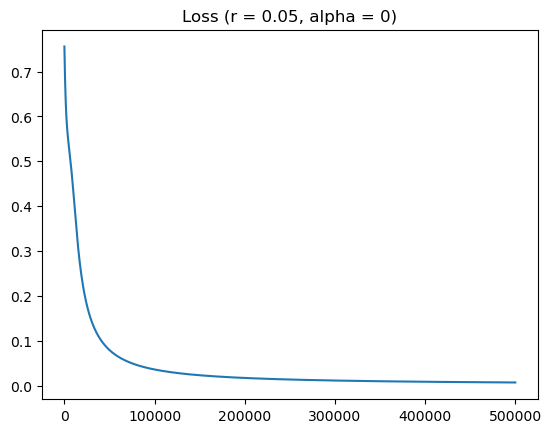

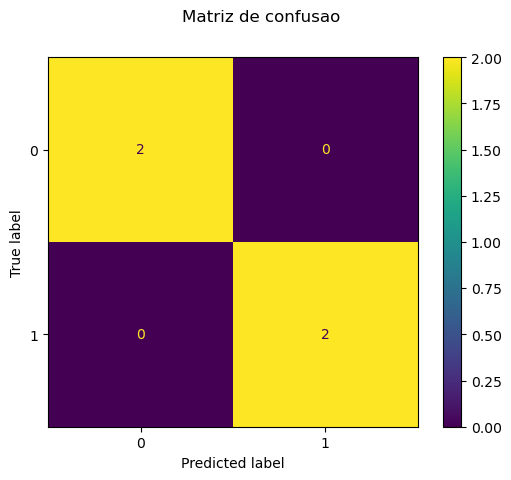

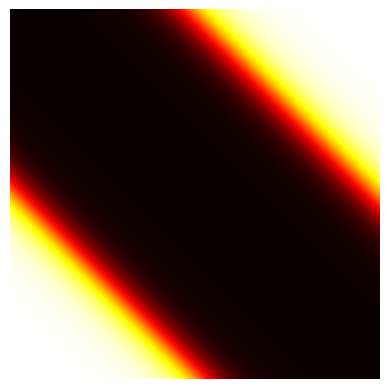

In [ ]:
plot(X=X_bipolar,y=y , mlp=mlp)

# Efeito da taxa de aprendizagem


In [ ]:
workbook = xlsxwriter.Workbook("results/1.Efeito da taxa de aprendizagem.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Efeito da taxa de aprendizagem")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, r=rates[j], alpha=alphas[0])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Efeito da introdução de um termo de momento

### alpha = 0.5

In [ ]:
workbook = xlsxwriter.Workbook("results/2.Efeito da introdução de um termo de momento.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Efeito da introdução de um termo de momento")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, r=rates[j], alpha=alphas[1])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=2

Score:  1.0
Number of iterations:  182335
Loss:  0.0022875126799867303
Score:  1.0
Number of iterations:  52719
Loss:  0.002283606958891128
Score:  1.0
Number of iterations:  30616
Loss:  0.0022830452193763812
Score:  1.0
Number of iterations:  17349
Loss:  0.002282736319788898
Score:  1.0
Number of iterations:  10090
Loss:  0.002282579644516302
Score:  1.0
Number of iterations:  184349
Loss:  0.0022876425625153432
Score:  1.0
Number of iterations:  52791
Loss:  0.0022836120450241987
Score:  1.0
Number of iterations:  30539
Loss:  0.0022830431547891847
Score:  1.0
Number of iterations:  28727
Loss:  0.002282767800738171
Score:  1.0
Number of iterations:  9845
Loss:  0.002282577492152041
Score:  1.0
Number of iterations:  184808
Loss:  0.002287676174448383
Score:  1.0
Number of iterations:  52913
Loss:  0.0022836155372185276
Score:  1.0
Number of iterations:  30932
Loss:  0.002283051832674626
Score:  1.0
Number of iterations:  17720
Loss:  0.00228274165326379
Score:  1.0
Number of itera

### alpha = 1

In [ ]:
worksheet.write(row,1, "alpha = 1")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, r=rates[j], alpha=alphas[2])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  91
Loss:  0.003277221073668038
Score:  1.0
Number of iterations:  51
Loss:  0.004039613355149243
Score:  1.0
Number of iterations:  42
Loss:  0.0034885305925216135
Score:  1.0
Number of iterations:  32
Loss:  0.003463308901936614
Score:  1.0
Number of iterations:  28
Loss:  0.0037486075677833483
Score:  1.0
Number of iterations:  110
Loss:  0.006922551341467662
Score:  1.0
Number of iterations:  47
Loss:  0.0029677965142849965
Score:  1.0
Number of iterations:  41
Loss:  0.00423925178819496
Score:  1.0
Number of iterations:  29
Loss:  0.0033193794218858387
Score:  1.0
Number of iterations:  24
Loss:  0.0038531789380102798
Score:  1.0
Number of iterations:  109
Loss:  0.00657520125976644
Score:  1.0
Number of iterations:  56
Loss:  0.004598212980622183
Score:  1.0
Number of iterations:  53
Loss:  0.0064921201404258035
Score:  1.0
Number of iterations:  31
Loss:  0.0030914279871361063
Score:  1.0
Number of iterations:  28
Loss:  0.00400816189490199
Scor

# Ordem de apresentação aleatória

In [ ]:
workbook = xlsxwriter.Workbook("results/3.Ordem de apresentação aleatória.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Ordem de apresentação aleatória")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, random=False, r=rates[j], alpha=alphas[2])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  103
Loss:  0.004714435406887952
Score:  1.0
Number of iterations:  63
Loss:  0.004864196341420515
Score:  1.0
Number of iterations:  41
Loss:  0.0035625781708938644
Score:  1.0
Number of iterations:  36
Loss:  0.004643705146754695
Score:  1.0
Number of iterations:  26
Loss:  0.00397177515662942
Score:  1.0
Number of iterations:  126
Loss:  0.005851177012058298
Score:  1.0
Number of iterations:  54
Loss:  0.004505037297651927
Score:  1.0
Number of iterations:  41
Loss:  0.00426119371199024
Score:  1.0
Number of iterations:  30
Loss:  0.003297188390813154
Score:  1.0
Number of iterations:  31
Loss:  0.004021090244705125
Score:  1.0
Number of iterations:  124
Loss:  0.007491881299359895
Score:  1.0
Number of iterations:  49
Loss:  0.003688267116474835
Score:  1.0
Number of iterations:  37
Loss:  0.003032262098299165
Score:  1.0
Number of iterations:  37
Loss:  0.004590783314818798
Score:  1.0
Number of iterations:  24
Loss:  0.0028734486446573347
Score: 

# Codificação binária

In [ ]:
workbook = xlsxwriter.Workbook("results/4.Codificação binária.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Codificação binária")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_binary,y=y, activation="relu", r=rates[j], alpha=alphas[0])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  182017
Loss:  0.0020494808427811285
Score:  1.0
Number of iterations:  36954
Loss:  0.00204995773749647
Score:  1.0
Number of iterations:  8352
Loss:  0.0022674408400695026
Score:  1.0
Number of iterations:  8946
Loss:  0.002044660569122215
Score:  1.0
Number of iterations:  4633
Loss:  0.0014293421367677778
Score:  1.0
Number of iterations:  133924
Loss:  0.0014766976342297082
Score:  1.0
Number of iterations:  26094
Loss:  0.0020784276743905324
Score:  1.0
Number of iterations:  13035
Loss:  0.002079038485842382
Score:  1.0
Number of iterations:  6972
Loss:  0.002068551244814041
Score:  1.0
Number of iterations:  4345
Loss:  0.0014406944872094201
Score:  1.0
Number of iterations:  107327
Loss:  0.001517672351492741
Score:  1.0
Number of iterations:  36680
Loss:  0.0020487389622885536
Score:  1.0
Number of iterations:  13795
Loss:  0.0014746472933937255
Score:  1.0
Number of iterations:  9067
Loss:  0.0020444481939478638
Score:  1.0
Number of iterati